In [1]:
# Import required libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Function to return average reward for each time step 

def k_bandit(arms, time, runs, epsilon, returnOpt):

    final_reward = [[] for i in range(0,len(epsilon))]    # Averaged rewards at each time step, for each ε
    final_optimal_action = [[] for i in range(0,len(epsilon))]  # Optimal Action % for each epsilon 
    
    for k in range(len(epsilon)):
        Rewards = np.zeros(time) 
        OptimalAction = np.zeros(time)
        
        for i in range(runs):
            q_Star = np.random.normal(0,1,arms)      # Randomly initialises the Q values between 0 & 1
            best_Action = np.argmax(q_Star)          # Stores the action with the highest value to the best_Action
            q_Est = np.zeros(arms)                   # Updates the estimated value of each arm
            counts = np.zeros(arms)                  # The amount of times each arm is taken
            rew = []  
            optimalAction = []
            
            for j in range(0,time):
                optimal_Count = 0
                if epsilon[k] > np.random.random():  # If the epsilon value is greater than RNG
                    action = np.random.randint(arms) # Make exploratory move
                else:
                    action = np.argmax(q_Est)        # Otherwise, exploit known knowledge. 
                if action == best_Action:           
                    optimal_Count = 1                # If the selected action is the best action, increase OC by 1 
                
                reward = q_Star[action] + np.random.normal(0,1) # Gaussian - Mean = 0, Variance = 1 
                counts[action] +=1 
                q_Est[action] += (1/counts[action])*(reward - q_Est[action]) # Update action values estimates
                rew.append(reward)
                optimalAction.append(optimal_Count)
                
            Rewards += rew
            OptimalAction += optimalAction
        
        final_reward[k] = Rewards / runs # Calculates the average reward for each timetsep
        final_optimal_action[k] = OptimalAction / runs # No. times optimal action chosen / total number of runs 
    
    # Chooses which array to return based on the returnOpt parameter 
    
    if returnOpt == 1:
        return final_optimal_action
    else:
        return final_reward
    

In [6]:
epsilon = [0,.01,.1] # The epsilon values to be tested 
reward = k_bandit(10, 1000, 2000, epsilon, 0) # Runs the function defined above and stores it in variable reward  
optAct = k_bandit(10, 1000, 2000, epsilon, 1) # Runs the function defined above and stores it in variable optAct

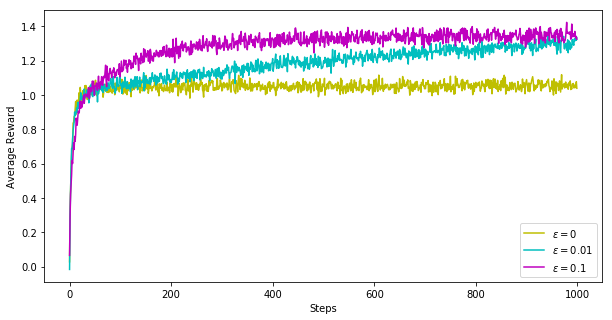

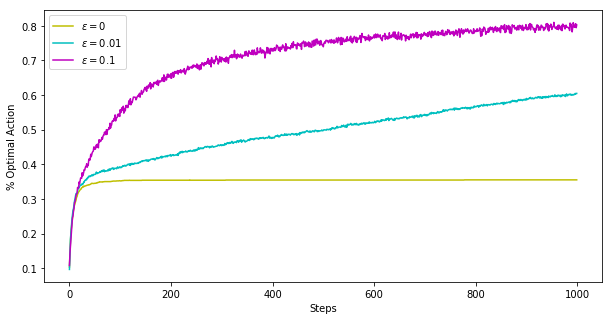

In [7]:
# This section plots out the graphs 

line_colours = ["y","c","m"] # List of colour chars to set the plot lines 

# Plot Average Reward Graph

plt.figure(figsize=(10,5)) 

for i in range(len(reward)):
    plt.plot(reward[i], label = "$\epsilon = $" +str(epsilon[i]), color = str(line_colours[i]))
       
plt.legend()        
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()

# Plot Optimal Action (%) Graph

plt.figure(figsize=(10,5)) 

for i in range(len(optAct)):
    plt.plot(optAct[i], label = "$\epsilon = $" +str(epsilon[i]), color = str(line_colours[i]))
       
plt.legend()        
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.legend()